Here we explore the LDA topic vectors identified based on nouns only in the full data set of coffee shop reviews. PCA is used to visualize.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [78]:
reviews = pd.read_csv('./ProcessedData/reviews_withlda5topicfeatures.csv')
reviews1 = pd.read_csv('./LDAresults/ldatopicweights_allreviews_5topics.csv')

reviews = reviews.merge(reviews1[['t0','t1','t2','t3','t4','alias']],how='inner',on='alias')
shops = pd.read_csv('./ProcessedData/coffeeshops_withcfcutoff.csv')
#don't forget to add length of review as a feature
reviews['len'] = [len(wordlist) for wordlist in reviews.mreviewtxt.str.split().to_list()]
print(reviews.mreviewtxt[0])
print(reviews.head(3))

i can't believe i have never left a review for this place considering the amount of times i stop by here. and all the times i have been here not once has aone been rude to me. i always make sure to get a latter art so maybe the taro or red velvet or matcha to be honest i like them all  just the cuteness of it makes me love it. understandable that ma people don't wanna pay   -  for such small cups of latte but it is definitely based on preference  second -- the bingsoo here is so so good  the one i get the most has to be the mango cheesecake it literally has lives of cheesecakes and has condensed milk and all that good stuff - it's very sweet incase u don't like that  i really don't think it's a miss if you come here   they have individual and large bingsoos-- i get individual because i don't like sharing the goodness ....
   index                      id          name                  alias  \
0      0  UZViRVpxNZvOM5KarmbT1g  Sweet Moment  sweet-moment-new-york   
1      0  UZViRVpxNZ

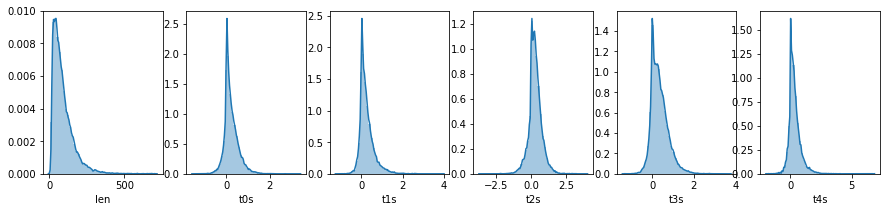

In [79]:
#How is the sentiment in reviews distributed
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(15,3))
sns.distplot(reviews.len,ax=ax1)
sns.distplot(reviews.t0s,ax=ax2)
sns.distplot(reviews.t1s,ax=ax3)
sns.distplot(reviews.t2s,ax=ax4)
sns.distplot(reviews.t3s,ax=ax5)
sns.distplot(reviews.t4s,ax=ax6)




The sentiment distributions are all shifted more towards the positive side than the negative side. There appears to be a single peak of review sentiments for each topic.

Below are the top 10 terms associated with each of the 5 topics.

[(0,
  '0.047*"place" + 0.030*"table" + 0.030*"work" + 0.025*"people" + '
  '0.019*"space" + 0.018*"area" + 0.018*"seat" + 0.018*"staff" + '
  '0.015*"seating" + 0.015*"location"'),
 
 
 (1,
  '0.088*"food" + 0.046*"sandwich" + 0.039*"breakfast" + 0.029*"place" + '
  '0.027*"lunch" + 0.021*"option" + 0.018*"bread" + 0.017*"item" + 0.016*"egg" '
  '+ 0.015*"salad"'),
 
 
 
 (2,
  '0.045*"time" + 0.041*"location" + 0.040*"customer" + 0.038*"service" + '
  '0.035*"drink" + 0.029*"line" + 0.024*"staff" + 0.022*"people" + '
  '0.020*"morning" + 0.019*"minute"'),
 
 
 
 (3,
  '0.225*"coffee" + 0.043*"place" + 0.036*"shop" + 0.029*"milk" + '
  '0.015*"staff" + 0.014*"latte" + 0.014*"service" + 0.012*"area" + '
  '0.012*"spot" + 0.011*"pastry"'),
 
 
 
 (4,
  '0.037*"tea" + 0.035*"chocolate" + 0.022*"drink" + 0.021*"flavor" + '
  '0.019*"cookie" + 0.017*"taste" + 0.016*"milk" + 0.013*"place" + '
  '0.011*"pastry" + 0.011*"cake"')]

Below we look at how the sentiment associated with a topics in a review is related to the length of the review.

Text(0.5, 1.0, 'Review length vs\n Coffee topic (t4) score')

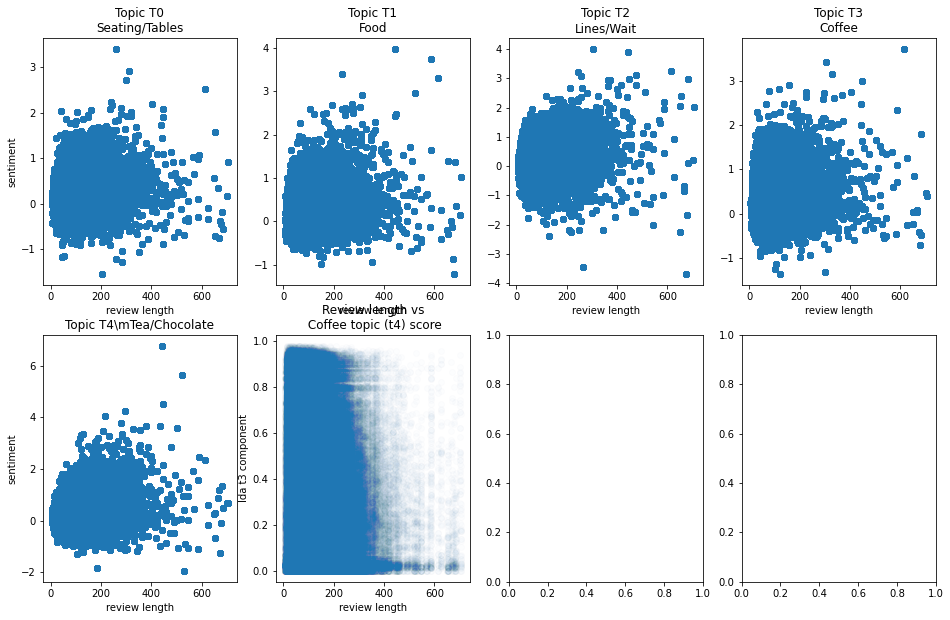

In [84]:
fig, ax = plt.subplots(2,4,figsize=(16,10))


ax[0,0].scatter(reviews.len,reviews.t0s,alpha=0.3)
ax[0,0].set_xlabel('review length')
ax[0,0].set_ylabel('sentiment')
ax[0,0].set_title('Topic T0\nSeating/Tables')

ax[0,1].scatter(reviews.len,reviews.t1s,alpha=0.3)
ax[0,1].set_xlabel('review length')
ax[0,1].set_title('Topic T1\nFood')

ax[0,2].scatter(reviews.len,reviews.t2s,alpha=0.3)
ax[0,2].set_xlabel('review length')
ax[0,2].set_title('Topic T2\nLines/Wait')

ax[0,3].scatter(reviews.len,reviews.t3s,alpha=0.3)
ax[0,3].set_xlabel('review length')
ax[0,3].set_title('Topic T3\nCoffee')


ax[1,0].scatter(reviews.len,reviews.t4s,alpha=0.3)
ax[1,0].set_xlabel('review length')
ax[1,0].set_ylabel('sentiment')
ax[1,0].set_title('Topic T4\mTea/Chocolate')


ax[1,1].scatter(reviews.len,reviews.t3,alpha=0.01)
ax[1,1].set_xlabel('review length')
ax[1,1].set_ylabel('lda t3 component')
ax[1,1].set_title('Review length vs\n Coffee topic (t4) score')

It looks like the length of a review isn't really associated with any stronger sentiment for any of the topics individually.  Also the amount of a review related cot coffee drops off rapidly beyond about 300 words. There is a lot of variation in the coffee topic fraction for short reviews.

Since we are interested in the effect of location on the topics discussed, and not the effect of things served by the restaurant, lets consider the topic distributions in reviews for Starbucks which are spread all over the place.

In [ ]:
#Now we look at the geographic distribution of reviews topics sentiments
#We first take the mean of the review topic vectors for each coffeeshop
#For each topic, we plot its importance on a m

In [31]:
merged = reviews
avgtopicbyalias = merged.groupby('alias')[['t0s','t1s','t2s','t3s','t4s','len','t0senlen',
                                          't1senlen','t2senlen','t3senlen','t4senlen']].mean()
avgtopicbyalias.reset_index()
avgtopicbyalias = avgtopicbyalias.merge(shops,how='inner',on='alias')

In [32]:
avgtopicbyalias.head(5)

alias       t0s       t1s       t2s       t3s  \
0  11th-street-cafe-new-york  0.193030  0.322494  0.202627  0.407608   
1      12-corners-new-york-4  0.306560  0.211017  0.402892  0.502161   
2            2beans-new-york  0.345892  0.323441  0.478017  0.516574   
3      787-coffee-new-york-2  0.319124  0.244912  0.421348  0.609411   
4      787-coffee-new-york-5  0.416909  0.267943  0.436310  0.683651   

        t4s         len   t0senlen   t1senlen   t2senlen  ...  price  rating  \
0  0.198591   68.625000  11.274176  14.404199  15.717694  ...     $$     4.0   
1  0.386748   81.816667  16.104243   9.340987  18.216957  ...      $     4.5   
2  0.754913  106.225000  18.693690  12.939556  21.557817  ...     $$     4.0   
3  0.413694   58.600000   8.388832   6.372326  13.889140  ...    NaN     4.5   
4  0.345510   65.941176  12.818116   8.632421  12.999237  ...    NaN     5.0   

             transactions   latitude  longitude  \
0  ['pickup', 'delivery']  40.735779 -74.007258   
1                      []  40.718041 -73.997208   
2  ['delivery', 'pickup']  40.751137 -73.978866   
3                      []  40.726290 -73.983860   
4  ['pickup', 'delivery']  40.703512 -74.010864   

                                       geometry  \
0      POINT (-74.007258262333 40.735778901325)   
1         POINT (-73.99720759999998 40.7180405)   
2                 POINT (-73.978866 40.7511373)   
3  POINT (-73.98385999999998 40.72629000000001)   
4                  POINT (-74.010864 40.703512)   

                                        catlist numcoffeemen  numreviews  \
0  ['breakfast_brunch', 'coffee', 'sandwiches']         24.0          40   
1                                    ['coffee']         49.0          60   
2                       ['chocolate', 'coffee']         30.0          40   
3                       ['coffee', 'empanadas']         35.0          40   
4                       ['coffee', 'empanadas']         14.0          17   

    fraccof  
0  0.600000  
1  0.816667  
2  0.750000  
3  0.875000  
4  0.823529  

[5 rows x 27 columns]

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes

#For creating interactive maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#Let's look at the distribution of the coffee shops on a map
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

import branca

In [57]:
#For each of the 5 topics, plot the topic sentiments on a map
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_2 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_3 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_4 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_5 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)

#add shops to the map, color coded by price


colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)    

for i in range(0,len(shops)):
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t0s'])).add_to(m_1)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t1s'])).add_to(m_2)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t2s'])).add_to(m_3)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t3s'])).add_to(m_4)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t4s'])).add_to(m_5)
    
    
    

colormap1 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap1.caption = 'Average topic t0 sentiment'
colormap1.add_to(m_1)

colormap2 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap2.caption = 'Average topic t1 sentiment'
colormap2.add_to(m_2)

colormap3 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap3.caption = 'Average topic t2 sentiment'
colormap3.add_to(m_3)

colormap4 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap4.caption = 'Average topic t3 sentiment'
colormap4.add_to(m_4)

colormap5 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap5.caption = 'Average topic t4 sentiment'
colormap5.add_to(m_5)


#display the maps. Work and tables topic

m_1

In [58]:
#Food topic
m_2

In [59]:
#Lines, time, morning topic
m_3

In [62]:
#Coffee Related Topic
m_4

In [63]:
#Tea and Chocolate Topic
m_5

In [64]:
#Length of reviews
m_6 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)

#add shops to the map, color coded by price


colorscale = branca.colormap.linear.YlOrRd_09.scale(50, 200)    


for i in range(0,len(shops)):
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['len'])).add_to(m_6)
    

colormap1 = branca.colormap.linear.YlOrRd_09.scale(50, 200)
colormap1.caption = 'Average topic t0 sentiment'
colormap1.add_to(m_6)

m_6

Observations of the geographic distribution of average topic components for coffee shops.

1. For most coffee shops in our data set, the amount of food discussion in a reviews is pretty low. This is also the case for the coffee/tea topic.

2. Average coffee fraction is higher for most coffee shops in the data set. This topic has the highest average review fraction for most coffee shops

3. The tables/seating topic t0, and line/time topic t2 have higher review components than the food (t1) and tea/chocolate (t4) topics.  The line/time topic appears to have a hotspot of high values at the southern tip of manhattan and closer to midtown. The tables/seating topic appears to have the opposite pattern.

In [70]:
#Repeating the process for only starbucks stores - controlling for what is sold
avgtopicbyalias = avgtopicbyalias[avgtopicbyalias.name=='Starbucks']
avgtopicbyalias.head(5)
avgtopicbyalias.shape


(104, 27)

In [71]:
##For each of the 5 topics, plot the topic sentiments on a map
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_2 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_3 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_4 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_5 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)

#add shops to the map, color coded by price


colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)    

for i in range(0,len(avgtopicbyalias)):
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t0s'])).add_to(m_1)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t1s'])).add_to(m_2)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t2s'])).add_to(m_3)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t3s'])).add_to(m_4)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t4s'])).add_to(m_5)
    
    
    

colormap1 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap1.caption = 'Average topic t0 sentiment'
colormap1.add_to(m_1)

colormap2 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap2.caption = 'Average topic t1 sentiment'
colormap2.add_to(m_2)

colormap3 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap3.caption = 'Average topic t2 sentiment'
colormap3.add_to(m_3)

colormap4 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap4.caption = 'Average topic t3 sentiment'
colormap4.add_to(m_4)

colormap5 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap5.caption = 'Average topic t4 sentiment'
colormap5.add_to(m_5)


#display the maps. Work and tables topic

m_1

In [72]:
#Food
m_2

In [73]:
#lines, time, mornig
m_3

In [74]:
#Coffee related topic
m_4

In [75]:
#Tea, chocolate, flavor, cookie, pastry topic
m_5

Summary of starbucks findings
1. Average topic values for starbucks are pretty homogeneous.  Dominated by lines, time, morning (t2) and tables, seating (t0) for all shops.  Average food topic % is low and average tea/chocolate topic % is low too.  The lines/time morning and seating/tables topics show similar geographic heterogeneity.  The fact that these topics show this heterogeneity despite the Starbucks product being the same indicates that geography is affecting the customer experience.  Perhaps there are longer lines in the places where topic t2 is stronger, and more seating/tables where topic t0 is stronger.

In [ ]:
#Lets see if the same geographic patterns show up for the non-Starbucks coffee shops

In [36]:
avgtopicbyalias = merged.groupby('alias')[['t0','t1','t2','t3','t4']].mean()
avgtopicbyalias.reset_index()
avgtopicbyalias = pd.merge(avgtopicbyalias,shops,how='inner',on = ['alias'])

In [37]:
avgtopicbyalias = avgtopicbyalias[avgtopicbyalias.name!='Starbucks']
avgtopicbyalias.head(3)


alias        t0        t1        t2        t3  \
0  11th-street-cafe-new-york  0.170237  0.263571  0.117953  0.326991   
1      12-corners-new-york-4  0.229236  0.051471  0.129740  0.465407   
2            2beans-new-york  0.205819  0.050986  0.098259  0.328570   

         t4                      id              name  is_closed  \
0  0.119889  PW3ty0qUsqcLHKfFlhY-7A  11th Street Cafe      False   
1  0.120559  Rs196agFk9VEW2mHrOwpvw        12 Corners      False   
2  0.313986  2uVut84nu_1J1iXRoXRMiQ            2Beans      False   

                                          categories  ...  price rating  \
0  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...  ...     $$    4.0   
1     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]  ...      $    4.5   
2  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...  ...     $$    4.0   

             transactions   latitude  longitude  \
0  ['pickup', 'delivery']  40.735779 -74.007258   
1                      []  40.718041 -73.997208   
2  ['delivery', 'pickup']  40.751137 -73.978866   

                                   geometry  \
0  POINT (-74.007258262333 40.735778901325)   
1     POINT (-73.99720759999998 40.7180405)   
2             POINT (-73.978866 40.7511373)   

                                        catlist numcoffeemen  numreviews  \
0  ['breakfast_brunch', 'coffee', 'sandwiches']         24.0          40   
1                                    ['coffee']         49.0          60   
2                       ['chocolate', 'coffee']         30.0          40   

    fraccof  
0  0.600000  
1  0.816667  
2  0.750000  

[3 rows x 21 columns]

In [38]:
#For each of the 5 topics, plot the topic scores on a map
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_2 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_3 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_4 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)
m_5 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13, width = 500, height=350)

#add shops to the map, color coded by price

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)    

for i in range(0,len(avgtopicbyalias)):
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t0'])).add_to(m_1)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t1'])).add_to(m_2)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t2'])).add_to(m_3)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t3'])).add_to(m_4)
    Circle(
        location=[avgtopicbyalias.iloc[i]['latitude'],avgtopicbyalias.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(avgtopicbyalias.iloc[i]['t4'])).add_to(m_5)
    
    
    

colormap1 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap1.caption = 'Average topic t0 fraction'
colormap1.add_to(m_1)

colormap2 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap2.caption = 'Average topic t1 fraction'
colormap2.add_to(m_2)

colormap3 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap3.caption = 'Average topic t2 fraction'
colormap3.add_to(m_3)

colormap4 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap4.caption = 'Average topic t3 fraction'
colormap4.add_to(m_4)

colormap5 = branca.colormap.linear.YlOrRd_09.scale(0, 0.5)
colormap5.caption = 'Average topic t4 fraction'
colormap5.add_to(m_5)


#display the maps. Work and tables topic

m_1

In [39]:
#Food topic
m_2

In [40]:
#Lines, time topic
m_3

In [41]:
#Coffee topic
m_4

In [42]:
#Tea/Chocolate topic
m_5

Some similar things show up with the lines/time topic (t2) and the tables seating topic (t0).  In busy places, there will probably be more mentions of lines, while in less  busy places there will be fewer of these.

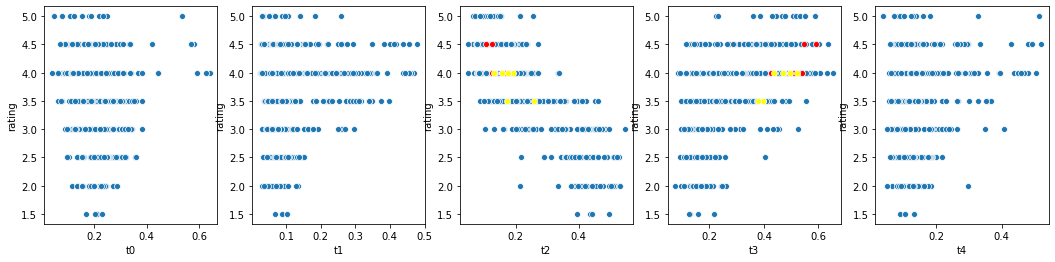

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#How does the average review topic fraction for a coffee shop relate to its rating?
avgtopicbyalias = merged.groupby('alias')[['t0','t1','t2','t3','t4']].mean()
avgtopicbyalias.reset_index()
avgtopicbyalias = pd.merge(avgtopicbyalias,shops,how='inner',on = ['alias'])

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(18,4))
sns.scatterplot(avgtopicbyalias.t0,avgtopicbyalias.rating,ax=ax1)
sns.scatterplot(avgtopicbyalias.t1,avgtopicbyalias.rating,ax=ax2)
sns.scatterplot(avgtopicbyalias.t2,avgtopicbyalias.rating,ax=ax3)

sns.scatterplot(avgtopicbyalias[avgtopicbyalias.name=='Birch Coffee'].t2,avgtopicbyalias[avgtopicbyalias.name=='Birch Coffee'].rating,
                    color = 'red',ax=ax3)
sns.scatterplot(avgtopicbyalias[avgtopicbyalias.name=='Joe Coffee Company'].t2,avgtopicbyalias[avgtopicbyalias.name=='Joe Coffee Company'].rating,
                    color = 'yellow',ax=ax3)

sns.scatterplot(avgtopicbyalias.t3,avgtopicbyalias.rating,ax=ax4)
sns.scatterplot(avgtopicbyalias[avgtopicbyalias.name=='Birch Coffee'].t3,avgtopicbyalias[avgtopicbyalias.name=='Birch Coffee'].rating,
                    color = 'red',ax=ax4)
sns.scatterplot(avgtopicbyalias[avgtopicbyalias.name=='Joe Coffee Company'].t3,avgtopicbyalias[avgtopicbyalias.name=='Joe Coffee Company'].rating,
                    color = 'yellow',ax=ax4)


sns.scatterplot(avgtopicbyalias.t4,avgtopicbyalias.rating,ax=ax5)


Places in which the lines/time topic (t2) makes up a big proportion of the review tend to have lower ratings.
Coffee topic (t3) proportion is positively correlated with higher ratings
Food topic (t1) proportion is positively correlated with higher ratings
Chocolate/tea topic (t4) proportion is positivey correlated with higher ratings.  
Tables/seating topic does not have a strong relationship to ratings. Plentiful seating could lead you to write about seating and give a high rating, or not write about seating at all.